In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

In [49]:
df=pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [50]:
df.shape

(569, 33)

In [51]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [52]:
# Removing unwanted columns
df.drop(['Unnamed: 32','id'], inplace = True, axis = 1)

In [53]:
print('Data Shape',df.shape)

Data Shape (569, 31)


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [55]:
df['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [56]:
df['diagnosis'].replace({'B':0,'M':1},inplace=True)
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Correlation matrix will tell us the relationship between *diagnosis* and other features. We will determine a correlation threshhold and everything below it will be dropped.

In [57]:
cor=df.corr()

In [58]:
cor.T

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


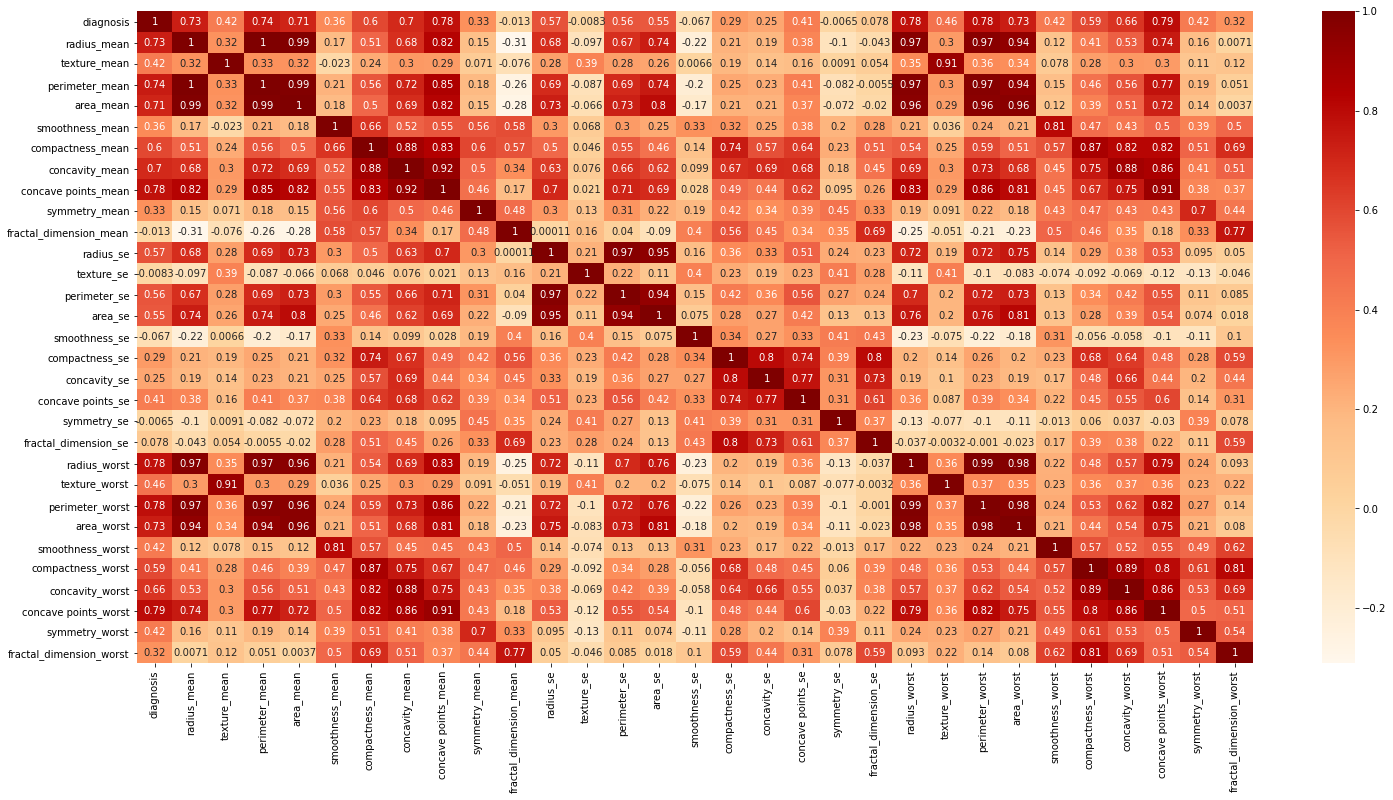

In [59]:
plt.figure(figsize=(25,12))
sns.heatmap(cor,cmap='OrRd', annot=True)
plt.show()

**2 sample t test for insignificant features like fractal_dimension_mean ,if it is effective or not since it has negative coorelation but is not mandatory as Non linear model can handle non linear relationships very well. So we don't bother to check the statistical inference
All are continous features
There is multicollinearity effect, which will be treated using PCA**



# Data Analysis

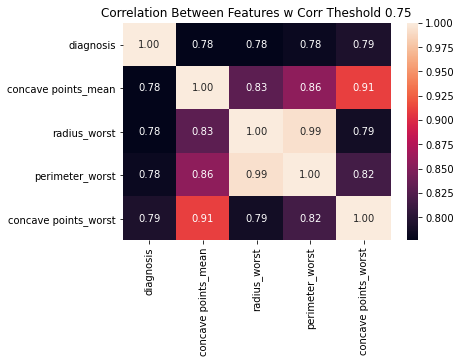

In [60]:
threshold = 0.75 
f = np.abs(cor["diagnosis"]) > threshold
corr_features = cor.columns[f].tolist()
sns.heatmap(df[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Theshold 0.75")
plt.show()

# Decision tree and Logistic Regression

In [61]:

from sklearn.model_selection import KFold,cross_val_score

from sklearn import model_selection

In [62]:
x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression



In [77]:
LR=LogisticRegression()
DT=DecisionTreeClassifier(criterion='entropy', random_state=0)

In [78]:
models=[]
models.append(('Logistic', LR))
models.append(('DecesionTree', DT))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic: 0.988804 (0.000036)
DecesionTree: 0.925109 (0.000594)


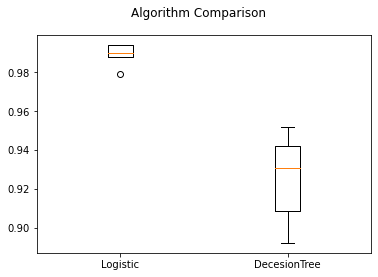

In [79]:
# evaluate each model in turn

results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
    cv_result=model_selection.cross_val_score(model,x,y,cv=kfold, scoring='roc_auc')
    results.append(cv_result)
    names.append(name)
    print('%s: %f (%f)' % (name,np.mean(cv_result),np.var(cv_result,ddof=1)))
    
#boxplot alogorithm comparison

fig=plt.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [67]:
# Now lets check for entropy = gini
LR=LogisticRegression()
DT=DecisionTreeClassifier(criterion='gini', random_state=0)

In [68]:
models=[]
models.append(('Logistic', LR))
models.append(('DecesionTree', DT))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic: 0.988804 (0.000036)
DecesionTree: 0.923706 (0.000607)


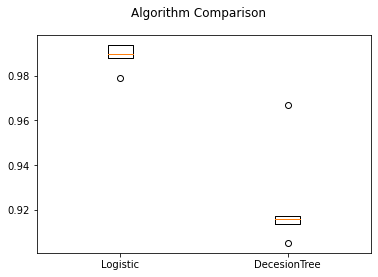

In [69]:
# evaluate each model in turn

results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
    cv_result=model_selection.cross_val_score(model,x,y,cv=kfold, scoring='roc_auc')
    results.append(cv_result)
    names.append(name)
    print('%s: %f (%f)' % (name,np.mean(cv_result),np.var(cv_result,ddof=1)))
    
#boxplot alogorithm comparison

fig=plt.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [70]:
# KFold scores
results

[array([0.98983804, 0.99358974, 0.97905405, 0.98785166, 0.99368771]),
 array([0.9158463 , 0.91346154, 0.91722973, 0.90505115, 0.96694352])]

# Visualizing the Decision Tree

Gini score is increasing the variance. So we will go with entropy.

In [71]:
DT.fit(x,y)

DecisionTreeClassifier(random_state=0)

In [72]:
from IPython.display import Image
from sklearn import tree
from os import system

BC_Tree_File=open('bc_data.dot','w')
dot_data=tree.export_graphviz(DT, out_file=BC_Tree_File,
                             feature_names=list(x), class_names=['Benign', 'Malignent'])
BC_Tree_File.close()

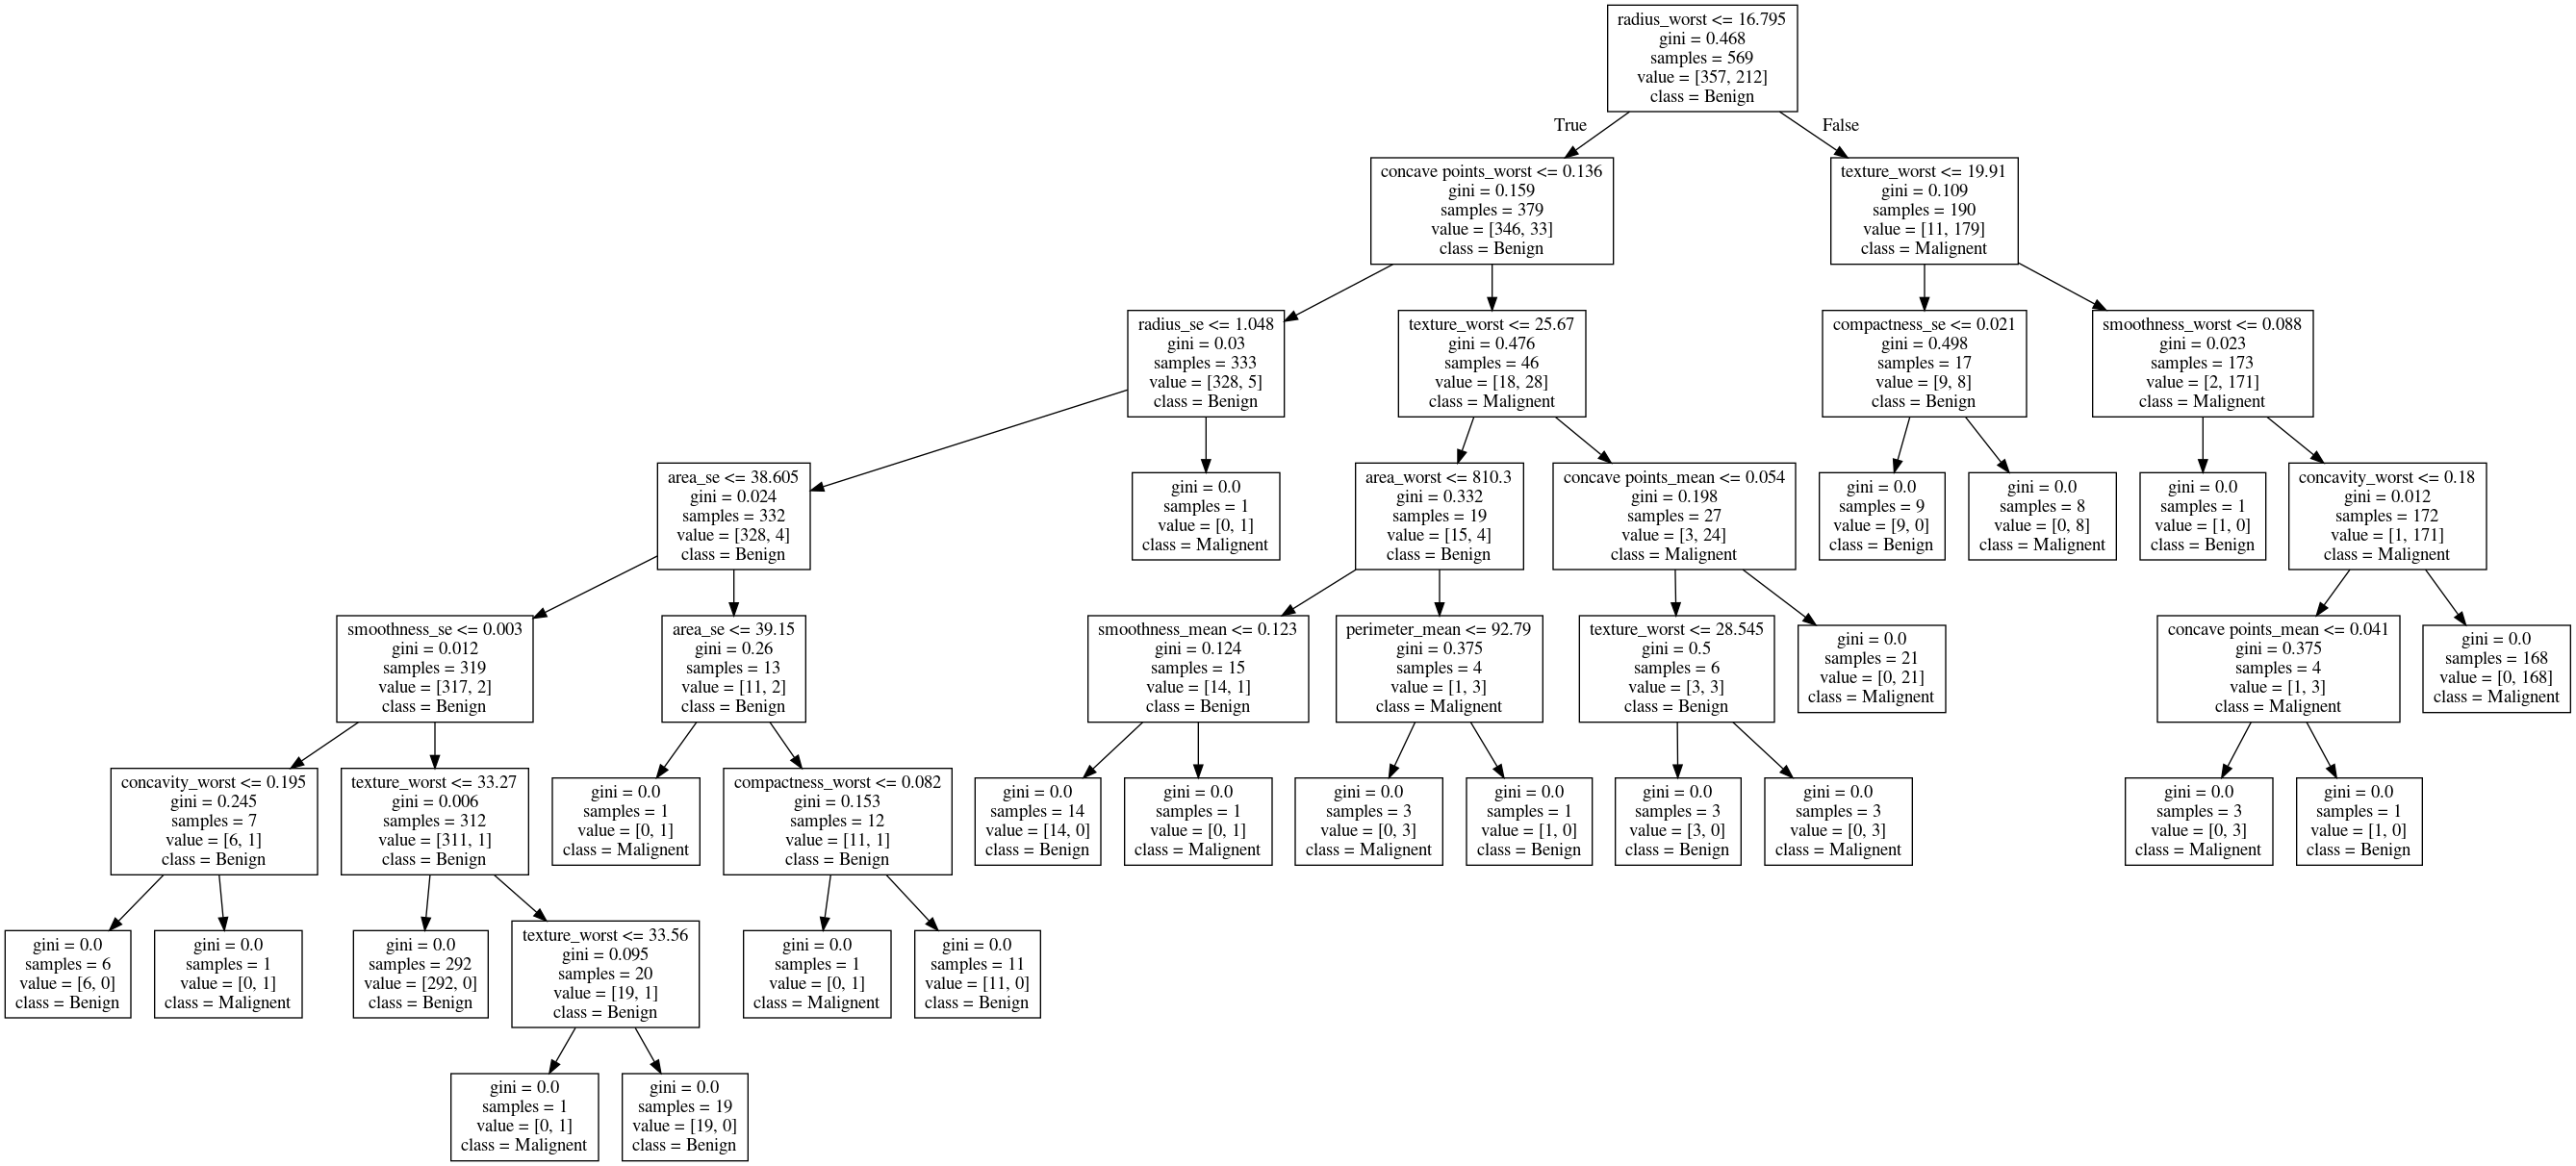

In [73]:
system('dot -Tpng bc_data.dot -o BC_tree.png') # This command is given to the OS
Image('BC_tree.png')

.dot is the extension of the file which is in write mode. We close the file after performing write operation in it.

There are 2 ways in visualing thi document template file. One is to convert it to a png format. That will give us the image inside the notebook.
Other is to visualize it otside our notebook like paid external resources. There are many website available for that. WebGraphViz is one such example.

We will stick to first option as we it is more feasible to us.
We now have our Entire Decision tree. 

How will we make sure your model is generalised?
Your variance error is dropped. We generalize the model to drop the variance error, because the fully grown tree is overfit

Before we procede further i want to see the feature importance score.

In [74]:
print(pd.DataFrame(DT.feature_importances_, columns=['imp'],index=x.columns))


                              imp
radius_mean              0.000000
texture_mean             0.000000
perimeter_mean           0.005639
area_mean                0.000000
smoothness_mean          0.007017
compactness_mean         0.000000
concavity_mean           0.000000
concave points_mean      0.014410
symmetry_mean            0.000000
fractal_dimension_mean   0.000000
radius_se                0.007316
texture_se               0.000000
perimeter_se             0.000000
area_se                  0.007877
smoothness_se            0.001004
compactness_se           0.031841
concavity_se             0.000000
concave points_se        0.000000
symmetry_se              0.000000
fractal_dimension_se     0.000000
radius_worst             0.695594
texture_worst            0.088561
perimeter_worst          0.000000
area_worst               0.011086
smoothness_worst         0.007388
compactness_worst        0.006892
concavity_worst          0.008280
concave points_worst     0.107097
symmetry_worst

Some of the features are not utilized at all. 

There are 2 drawbacks of Decision Tree
Decision Tree here looks like Lasso regression as many features are penalised. If we keep on proceding with it, we will keep on reducing the columns , it will underfit and at the end we will be left with a null model. I will have to declare all as Benign. Decision Tree by default is highly biased, it is greedy in nature.Your model will underfit. Because of fully grown nature, Decision tree will suffer from high variance error. Because of highly biased nature, it will suffer from highly bias error.
These two are major drawbacks of Decision Tree.
This is the highly peculiar nature of Decision Tree. No other model suffer  from both such drawbacks. Either they have high variance error or high bias error. Simultaneously there is only one model which is vulnerable to Both is only Decision tree. Obviously we can regularize it by Random Forest but it will not have an effective improvement

## **Regularizing the Decision Tree**

In [80]:
DT_reg=DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=0)
models.append(('Regularised DT', DT_reg))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic: 0.988804 (0.000036)
DecesionTree: 0.925109 (0.000594)
Regularised DT: 0.929676 (0.001093)


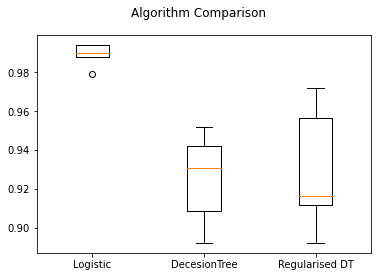

In [81]:
# evaluate each model in turn

results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
    cv_result=model_selection.cross_val_score(model,x,y,cv=kfold, scoring='roc_auc')
    results.append(cv_result)
    names.append(name)
    print('%s: %f (%f)' % (name,np.mean(cv_result),np.var(cv_result,ddof=1)))
    
#boxplot alogorithm comparison

fig=plt.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The variance error increased :| 
Thats because we have some noise in our dataset.
We will do PCA Later to reduce it.



In [82]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier(n_estimators=10, random_state=0)


In [83]:
models.append(('Random Forest', ))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic: 0.988804 (0.000036)
DecesionTree: 0.925109 (0.000594)
Regularised DT: 0.929676 (0.001093)
Random Forest: 0.988738 (0.000126)


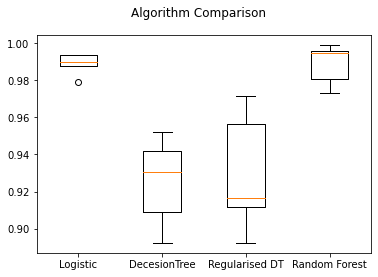

In [84]:
# evaluate each model in turn

results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
    cv_result=model_selection.cross_val_score(model,x,y,cv=kfold, scoring='roc_auc')
    results.append(cv_result)
    names.append(name)
    print('%s: %f (%f)' % (name,np.mean(cv_result),np.var(cv_result,ddof=1)))
    
#boxplot alogorithm comparison

fig=plt.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Train Test Split

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)


In [87]:
print("X_train",len(x_train))
print("X_test",len(x_test))
print("Y_train",len(y_train))
print("Y_test",len(y_test))

X_train 398
X_test 171
Y_train 398
Y_test 171


## Standardization

In [88]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [89]:
x_ss=ss.fit_transform(x)

# Basic KNN

In [91]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

ypred_train=knn.predict(x_train)
yprob_train=knn.predict_proba(x_train)[:,1]

ypred_test=knn.predict(x_test)
yprob_test=knn.predict_proba(x_test)[:,1]


In [92]:
print('for KNN Train')
print('confusion matrix', confusion_matrix(y_train,ypred_train))
print('accuracy score', accuracy_score(y_train,ypred_train))
print('roc_auc score', roc_auc_score(y_train,yprob_train))

print('\n')

print('for KNN Test')
print('confusion matrix', confusion_matrix(y_test,ypred_test))
print('accuracy score', accuracy_score(y_test,ypred_test))
print('roc_auc score', roc_auc_score(y_test,yprob_test))

for KNN Train
confusion matrix [[249   0]
 [  9 140]]
accuracy score 0.9773869346733668
roc_auc score 0.997695479906202


for KNN Test
confusion matrix [[105   3]
 [  4  59]]
accuracy score 0.9590643274853801
roc_auc score 0.9786890064667844


We created knn to male prediction and saw ho wmany false guesses we have made using the confusion matrix.


In [93]:
# hyper parameter tuning 

param_dist={'n_neighbors':sp_randint(1,31),
           'weights':['uniform','distance']}
knn=KNeighborsClassifier()
rsearch=RandomizedSearchCV(knn,param_distributions=param_dist,n_iter=25,cv=3,random_state=42,scoring='roc_auc')
rsearch.fit(x_ss,y)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=25,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7eff18da50>,
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='roc_auc')

In [94]:
rsearch.best_params_

{'n_neighbors': 12, 'weights': 'distance'}

In [95]:
rsearch.best_score_

0.9933967953378534

In [97]:
# using tuned values

knn=KNeighborsClassifier(**rsearch.best_params_)

knn.fit(x_train,y_train)

ypred_train=knn.predict(x_train)
yprob_train=knn.predict_proba(x_train)[:,1]

ypred_test=knn.predict(x_test)
yprob_test=knn.predict_proba(x_test)[:,1]

print('for hyper tuned KNN Train')
print('confusion matrix', confusion_matrix(y_train,ypred_train))
print('accuracy score', accuracy_score(y_train,ypred_train))
print('roc_auc score', roc_auc_score(y_train,yprob_train))

print('\n')

print('for hypertuned KNN Test')
print('confusion matrix', confusion_matrix(y_test,ypred_test))
print('accuracy score', accuracy_score(y_test,ypred_test))
print('roc_auc score', roc_auc_score(y_test,yprob_test))

for hyper tuned KNN Train
confusion matrix [[249   0]
 [  0 149]]
accuracy score 1.0
roc_auc score 1.0


for hypertuned KNN Test
confusion matrix [[106   2]
 [  3  60]]
accuracy score 0.9707602339181286
roc_auc score 0.9939741328630217


# PCA

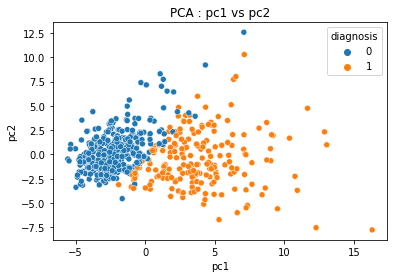

In [102]:
ss = StandardScaler()
x_ss = ss.fit_transform(x)

pca = PCA(n_components = 2) 
pca.fit(x_ss)
X_reduced_pca = pca.transform(x_ss)
pca_data = pd.DataFrame(X_reduced_pca, columns = ["pc1","pc2"])
pca_data["diagnosis"] = y
sns.scatterplot(x = "pc1", y = "pc2", hue = "diagnosis", data = pca_data)
plt.title("PCA : pc1 vs pc2")

X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_reduced_pca, y, test_size = 0.3, random_state = 42)

In [103]:
knn=KNeighborsClassifier()
knn.fit(X_train_pca,Y_train_pca)

ypred_train=knn.predict(X_train_pca)
yprob_train=knn.predict_proba(X_train_pca)[:,1]

ypred_test=knn.predict(X_test_pca)
yprob_test=knn.predict_proba(X_test_pca)[:,1]

print('for KNN Train')
print('confusion matrix', confusion_matrix(Y_train_pca,ypred_train))
print('accuracy score', accuracy_score(Y_train_pca,ypred_train))
print('roc_auc score', roc_auc_score(Y_train_pca,yprob_train))

print('\n')

print('for KNN Test')
print('confusion matrix', confusion_matrix(Y_test_pca,ypred_test))
print('accuracy score', accuracy_score(Y_test_pca,ypred_test))
print('roc_auc score', roc_auc_score(Y_test_pca,yprob_test))

for KNN Train
confusion matrix [[237  12]
 [ 13 136]]
accuracy score 0.9371859296482412
roc_auc score 0.9879518072289156


for KNN Test
confusion matrix [[102   6]
 [  1  62]]
accuracy score 0.9590643274853801
roc_auc score 0.9950764256319812


Improved!!!!!!!!

Hurray!!!

# Thank You